In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, roc_auc_score, precision_score, recall_score, f1_score, accuracy_score, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

In [75]:
# Read data
data = pd.read_csv("/Users/shivanigupta/Downloads/Customer_Churn_Dataset.csv")



In [76]:
data.shape

(1000, 8)

In [50]:
# Feature Engineering
#Since data has no identifier for customer, creating a custom indentifier for every customer
data['key'] = data['Age'].astype(str) + data['Gender'].astype(str) + data['Income'].astype(str) + data['Account_Length'].astype(str)


In [51]:
# Separate features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']


In [52]:
features = data.columns
for feature in features:
     print(f'{feature}:{data[feature].nunique()}')

Age:62
Gender:2
Income:997
Account_Length:49
Contract_Type:3
Call_Duration:625
Data_Usage:428
Churn:2
key:1000


In [53]:
data.isnull().sum() / data.shape[0]


Age               0.0
Gender            0.0
Income            0.0
Account_Length    0.0
Contract_Type     0.0
Call_Duration     0.0
Data_Usage        0.0
Churn             0.0
key               0.0
dtype: float64

In [54]:
def unique_object(data):
    for column in data:
        if data[column].dtype=='object':
            print(f'{column}:{data[column].unique()}')

In [55]:
unique_object(data)

key:['5615719813' '6912882022' '4604407019' '3218976834' '6013112214'
 '2501005594' '7819354348' '38110344146' '5616178627' '75111493429'
 '36111980447' '4002673728' '2815606235' '281742378' '4117157116'
 '7014551042' '5313942636' '5705726530' '4113785018' '2001382492'
 '3908615049' '70110731213' '1911096134' '4119491026' '6117237525'
 '47014182630' '5515543511' '1911164437' '7717713231' '3819894544'
 '50110205010' '29114982839' '75011540213' '3902298331' '7811172417'
 '6114066249' '4214351042' '6609818742' '4416099836' '7607684620'
 '5911140714' '451266407' '771645471' '3317462044' '3203531745'
 '79013560842' '7912756447' '6414734513' '79013382422' '68011422321'
 '61014337222' '7209927328' '691948599' '74010076526' '2011300179'
 '5409403815' '68014361810' '2407239324' '3808608142' '2601453418'
 '56112265024' '3514943016' '2109553249' '4204778826' '77111550527'
 '3106854337' '670339194' '7518934624' '26011612219' '4305997436'
 '70112730939' '1913637110' '3716508425' '4504962918' '64171

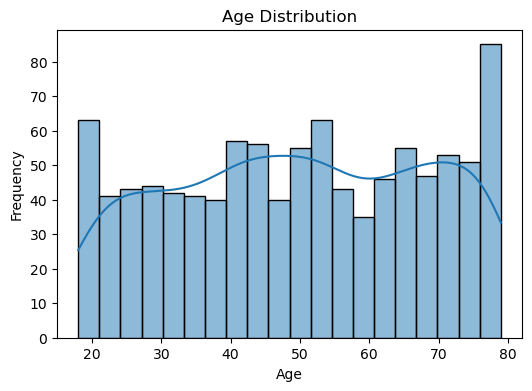

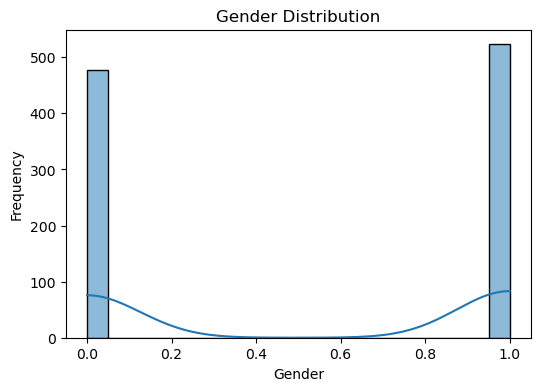

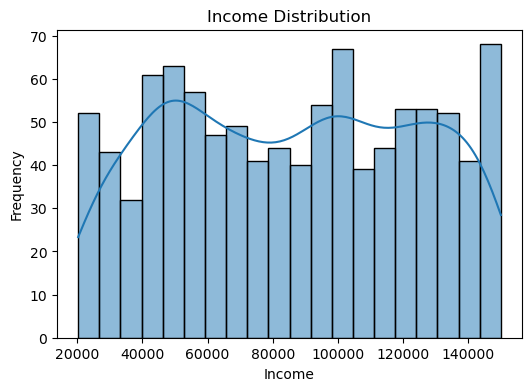

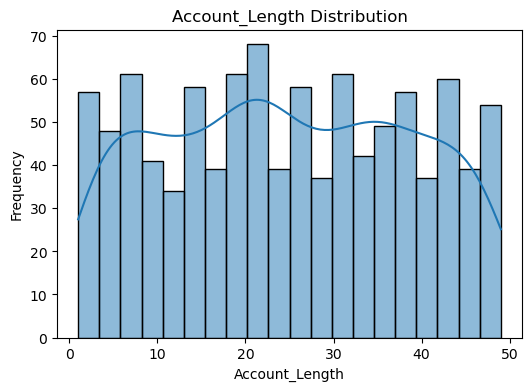

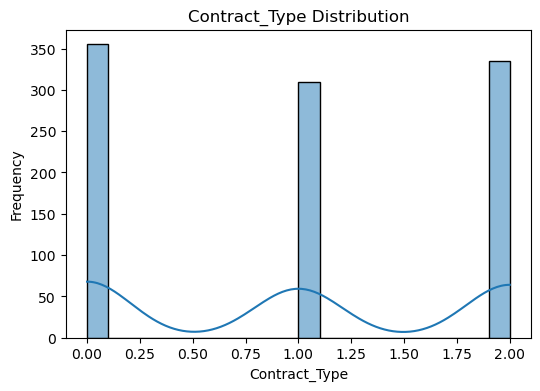

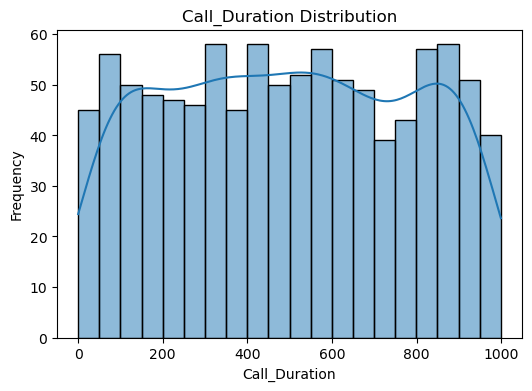

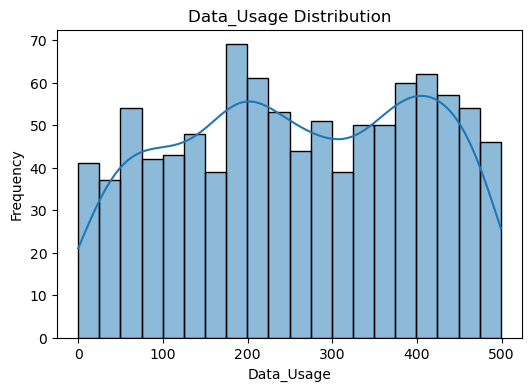

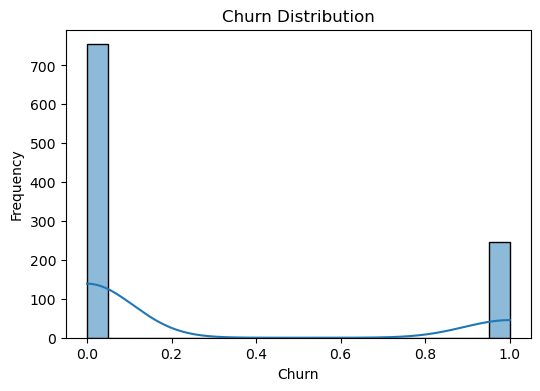

In [56]:
for column in data.columns:
    if data[column].dtype == 'int64' or data[column].dtype == 'float64':
        plt.figure(figsize=(6, 4))
        sns.histplot(data[column], bins=20, kde=True)
        plt.title(f'{column} Distribution')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()


In [57]:
data.columns

Index(['Age', 'Gender', 'Income', 'Account_Length', 'Contract_Type',
       'Call_Duration', 'Data_Usage', 'Churn', 'key'],
      dtype='object')

In [58]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [59]:
data.groupby('Churn').describe()
# .to_csv('descriptive.csv')

Age                                                      Gender  \
       count       mean        std   min   25%   50%    75%   max  count   
Churn                                                                      
0      754.0  49.884615  18.297561  18.0  34.0  50.0  66.00  79.0  754.0   
1      246.0  49.772358  17.576800  18.0  36.0  50.0  65.75  79.0  246.0   

                                                   Income                \
           mean       std  min  25%  50%  75%  max  count          mean   
Churn                                                                     
0      0.522546  0.499823  0.0  0.0  1.0  1.0  1.0  754.0  86238.212202   
1      0.524390  0.500423  0.0  0.0  1.0  1.0  1.0  246.0  85689.044715   

                                                                     \
                std      min       25%      50%       75%       max   
Churn                                                                 
0      38183.924439  20281.0  51890.00  87283.5  120638.0  149972.0   
1      37007.360949  20619.0  54862.25  84918.0  116463.0  149749.0   

      Account_Length                                                     \
               count       mean        std  min   25%   50%   75%   max   
Churn                                                                     
0              754.0  24.412467  13.845703  1.0  13.0  24.0  36.0  49.0   
1              246.0  25.707317  14.142847  1.0  13.0  25.0  38.0  49.0   

      Contract_Type                                               \
              count      mean       std  min  25%  50%  75%  max   
Churn                                                              
0             754.0  0.958886  0.835568  0.0  0.0  1.0  2.0  2.0   
1             246.0  1.044715  0.814431  0.0  0.0  1.0  2.0  2.0   

      Call_Duration                                                      \
              count        mean         std  min     25%    50%     75%   
Churn                                                                     
0             754.0  494.305040  283.250357  0.0  255.50  493.0  738.25   
1             246.0  506.097561  294.084658  2.0  248.25  505.5  760.75   

             Data_Usage                                                      \
         max      count        mean         std  min     25%    50%     75%   
Churn                                                                         
0      996.0      754.0  262.246684  142.085249  0.0  148.00  263.0  392.75   
1      999.0      246.0  250.516260  141.428823  2.0  133.25  248.5  376.75   

              
         max  
Churn         
0      499.0  
1      497.0

In [60]:
data.drop(columns=['Gender','Contract_Type','key']).groupby('Churn').mean()

,Age,Income,Account_Length,Call_Duration,Data_Usage
Churn,,,,,
0,49.884615,86238.212202,24.412467,494.305040,262.246684
1,49.772358,85689.044715,25.707317,506.097561,250.516260


#Churned customers have lesser income, mean call duration, mean data usage

In [61]:
data['Contract_Type'].value_counts()

Contract_Type
0    355
2    335
1    310
Name: count, dtype: int64

In [62]:
pd.crosstab(data['Churn'],data['Contract_Type'])

Contract_Type,0,1,2
Churn,,,
0,279,227,248
1,76,83,87


#Contract Type 0 has the minimum Churn

In [63]:
pd.crosstab(data['Churn'],data['Gender'])

Gender,0,1
Churn,,
0,360,394
1,117,129


In [64]:
#Gender 0 has less churn as compared to Gender 1

In [65]:


# Find the minimum and maximum age in the dataset
min_age = data['Age'].min()
max_age = data['Age'].max()

# Define the bin size
bin_size = 10

# Create bins dynamically
bins = list(range(min_age, max_age + bin_size, bin_size))

# Create labels for the bins
labels = [f"{bins[i]}-{bins[i+1]}" for i in range(len(bins) - 1)]

# Create a new column 'AgeGroup' based on age bins
data['AgeGroup'] = pd.cut(data['Age'], bins=bins, labels=labels, include_lowest=True)

# Calculate churn rate for each age group
churn_rate_by_age = data.groupby('AgeGroup')['Churn'].sum()

# Find the age group with maximum churn
max_churn_age_group = churn_rate_by_age.idxmax()
max_churn_rate = churn_rate_by_age.max()

print(f"The age group with maximum churn is {max_churn_age_group} with a churn rate of {max_churn_rate}")


The age group with maximum churn is 48-58 with a churn rate of 50


In [66]:
print(churn_rate_by_age)


AgeGroup
18-28    35
28-38    37
38-48    39
48-58    50
58-68    37
68-78    41
78-88     7
Name: Churn, dtype: int64


##### The age group with maximum churn is 48-58 with a churn rate of 50

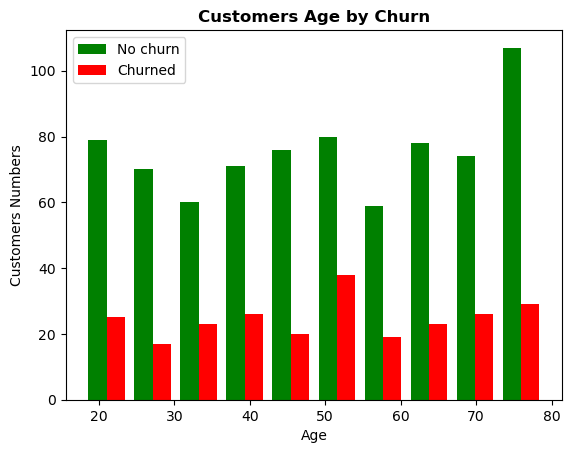

In [67]:
Customer_nochurn=data[data['Churn']==0].Age
Customer_Churned=data[data['Churn']==1].Age


plt.xlabel('Age')
plt.ylabel('Customers Numbers')
plt.hist([Customer_nochurn,Customer_Churned], color=['green','red'],label=['No churn','Churned'])

plt.title('Customers Age by Churn',fontweight ="bold")
plt.legend()

<Axes: >

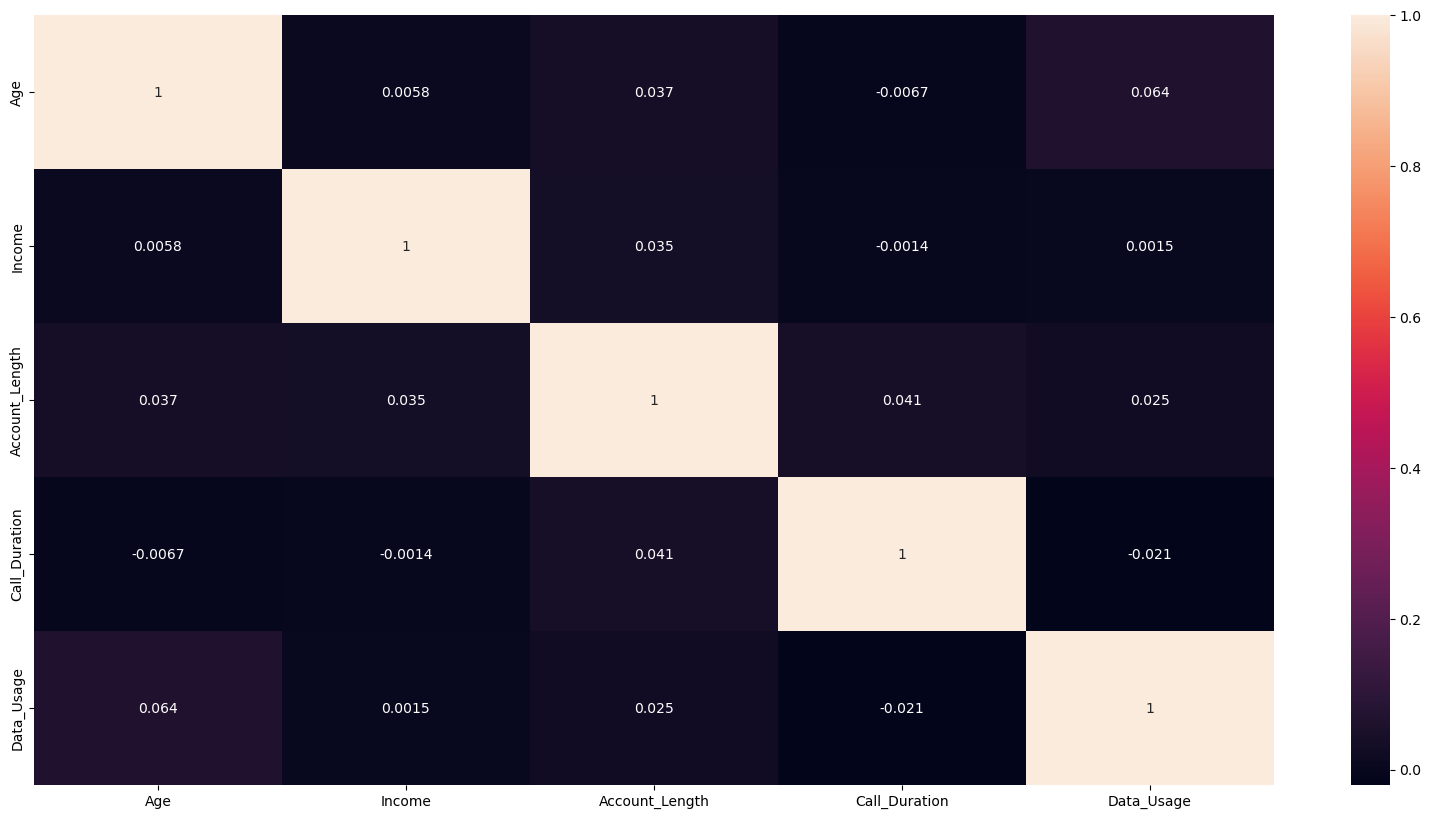

In [70]:
data1  = data.drop(columns=['Gender','Contract_Type','Churn','key','AgeGroup']).corr()
plt.figure(figsize = (20,10))
sns.heatmap(data1, annot = True)

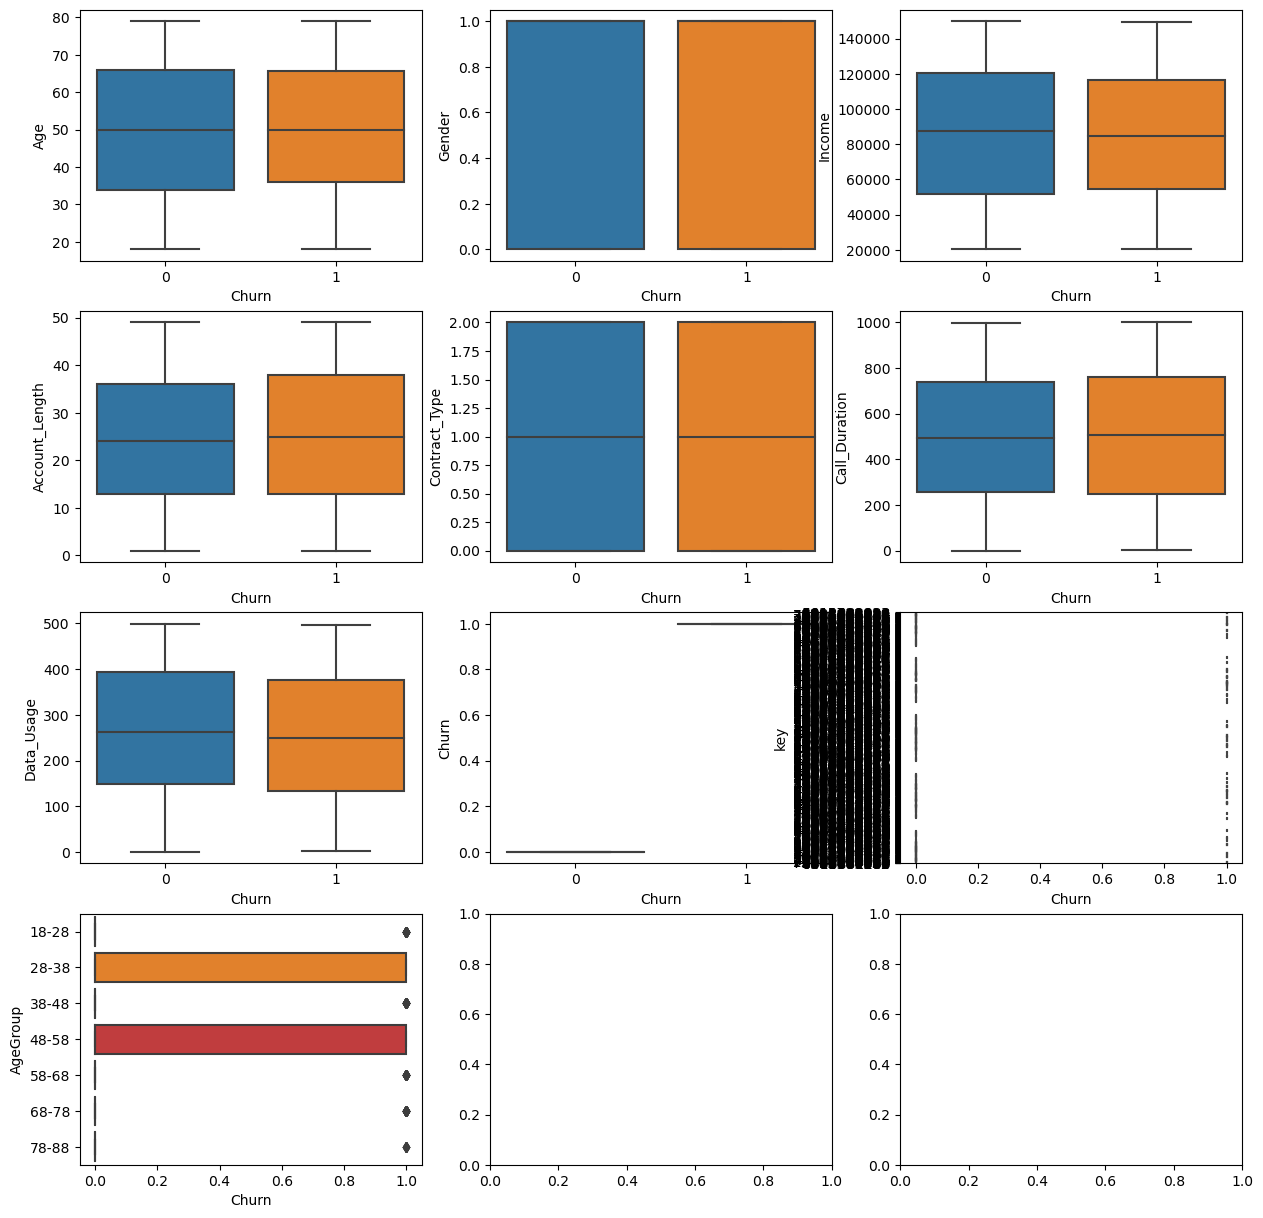

In [71]:
fig, ax = plt.subplots(4,3, figsize = (15,15))
for i, subplot in zip(data, ax.flatten()):
    sns.boxplot(x = 'Churn', y = i , data = data, ax = subplot)

###Churn cases have lesser data usage, lesser call duration. However, relative to No churn cases, difference is not significant 

In [72]:
import plotly.express as px 

fig = px.density_heatmap(data, x='Age', y='Data_Usage')
fig.show()

In [74]:
data[['AgeGroup','Call_Duration','Data_Usage']].groupby(['AgeGroup']).mean()

,Call_Duration,Data_Usage
AgeGroup,,
18-28,490.113208,234.213836
28-38,491.014286,263.121429
38-48,536.000000,257.023810
48-58,477.822857,264.914286
58-68,496.933333,271.900000
68-78,495.379888,257.391061
78-88,470.896552,306.413793


#Age group 38-48 has max meancall duration. 

#Age group 78-88 has max mean data usage duration


In [24]:
cross_table = pd.crosstab(index=data['AgeGroup'], columns=data['Churn'], values=data['Income'], aggfunc='mean')


In [25]:
print(cross_table)

Churn                0             1
AgeGroup                            
18-28     85637.733871  95478.257143
28-38     85602.368932  86792.702703
38-48     83632.395349  85230.102564
48-58     87116.072000  80994.420000
58-68     86995.336283  84914.027027
68-78     89629.369565  82197.902439
78-88     77730.681818  91544.000000


In [26]:
# the mean income of Age groups in the range 78-88 and 18-28  is the highest. May be more income, less patience

In [27]:
cross_table = pd.crosstab(index=data['AgeGroup'], columns=data['Churn'], values=data['Call_Duration'], aggfunc='mean')


In [28]:
print(cross_table)

Churn              0           1
AgeGroup                        
18-28     475.645161  541.371429
28-38     490.747573  491.756757
38-48     525.868217  569.512821
48-58     479.784000  472.920000
58-68     497.840708  494.162162
68-78     500.253623  478.975610
78-88     458.090909  511.142857


In [29]:
cross_table = pd.crosstab(index=data['AgeGroup'], columns=data['Churn'], values=data['Data_Usage'], aggfunc='mean')
print(cross_table)

Churn              0           1
AgeGroup                        
18-28     226.330645  262.142857
28-38     263.572816  261.864865
38-48     264.775194  231.384615
48-58     271.392000  248.720000
58-68     277.044248  256.189189
68-78     262.311594  240.829268
78-88     315.272727  278.571429


<Axes: xlabel='Churn'>

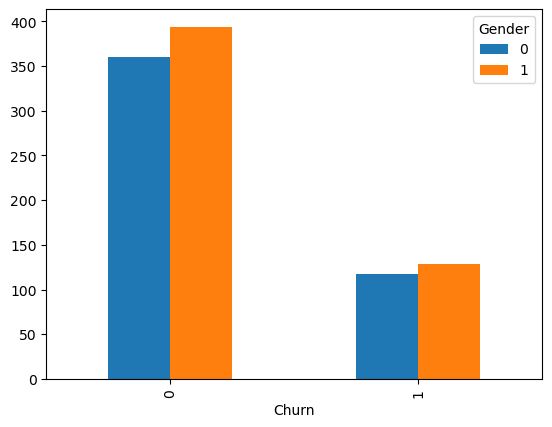

In [30]:
pd.crosstab(data['Churn'], data['Gender']).plot(kind='bar')


In [31]:
data.columns

Index(['Age', 'Gender', 'Income', 'Account_Length', 'Contract_Type',
       'Call_Duration', 'Data_Usage', 'Churn', 'key', 'AgeGroup'],
      dtype='object')

<Axes: xlabel='Churn'>

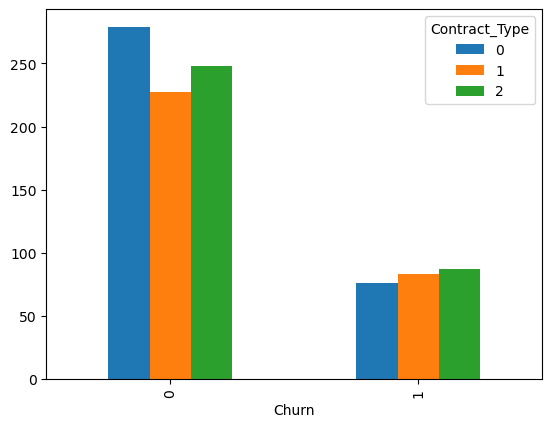

In [32]:
pd.crosstab(data['Churn'], data['Contract_Type']).plot(kind='bar')


In [33]:
#Contract #2 has highest Churn

In [34]:
#ML Modeling
data.drop(['AgeGroup'],axis=1,inplace=True)

In [35]:
# Feature Engineering
data['key'] = data['Age'].astype(str) + data['Gender'].astype(str) + data['Income'].astype(str) + data['Account_Length'].astype(str)

# Separate features and target variable
X = data.drop(columns=['Churn'])
y = data['Churn']

print("Churn vs. Not Churn Split Before SMOTE:")
print(data['Churn'].value_counts())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Churn vs. Not Churn Split Before SMOTE:
Churn
0    754
1    246
Name: count, dtype: int64


In [36]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [37]:
# Churn vs. not churn split after SMOTE
print("\nChurn vs. Not Churn Split After SMOTE:")
print(pd.Series(y_train_resampled).value_counts())


Churn vs. Not Churn Split After SMOTE:
Churn
1    614
0    614
Name: count, dtype: int64


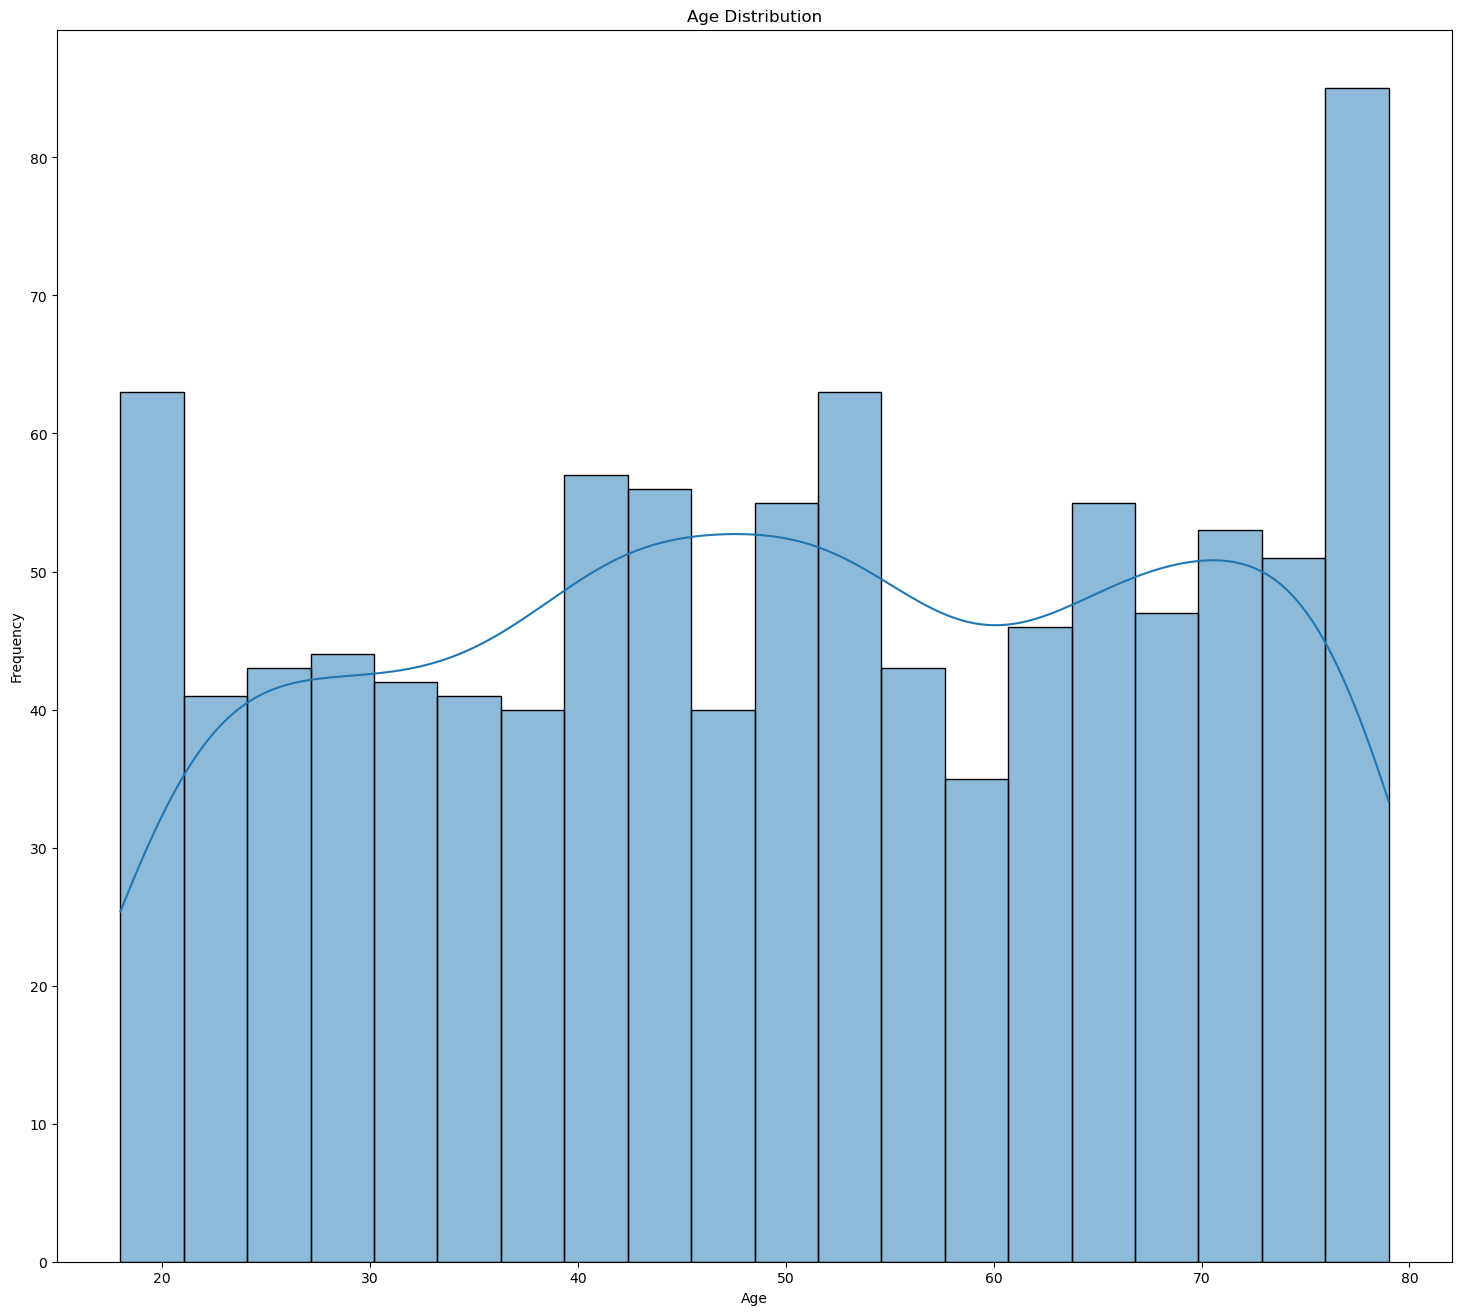

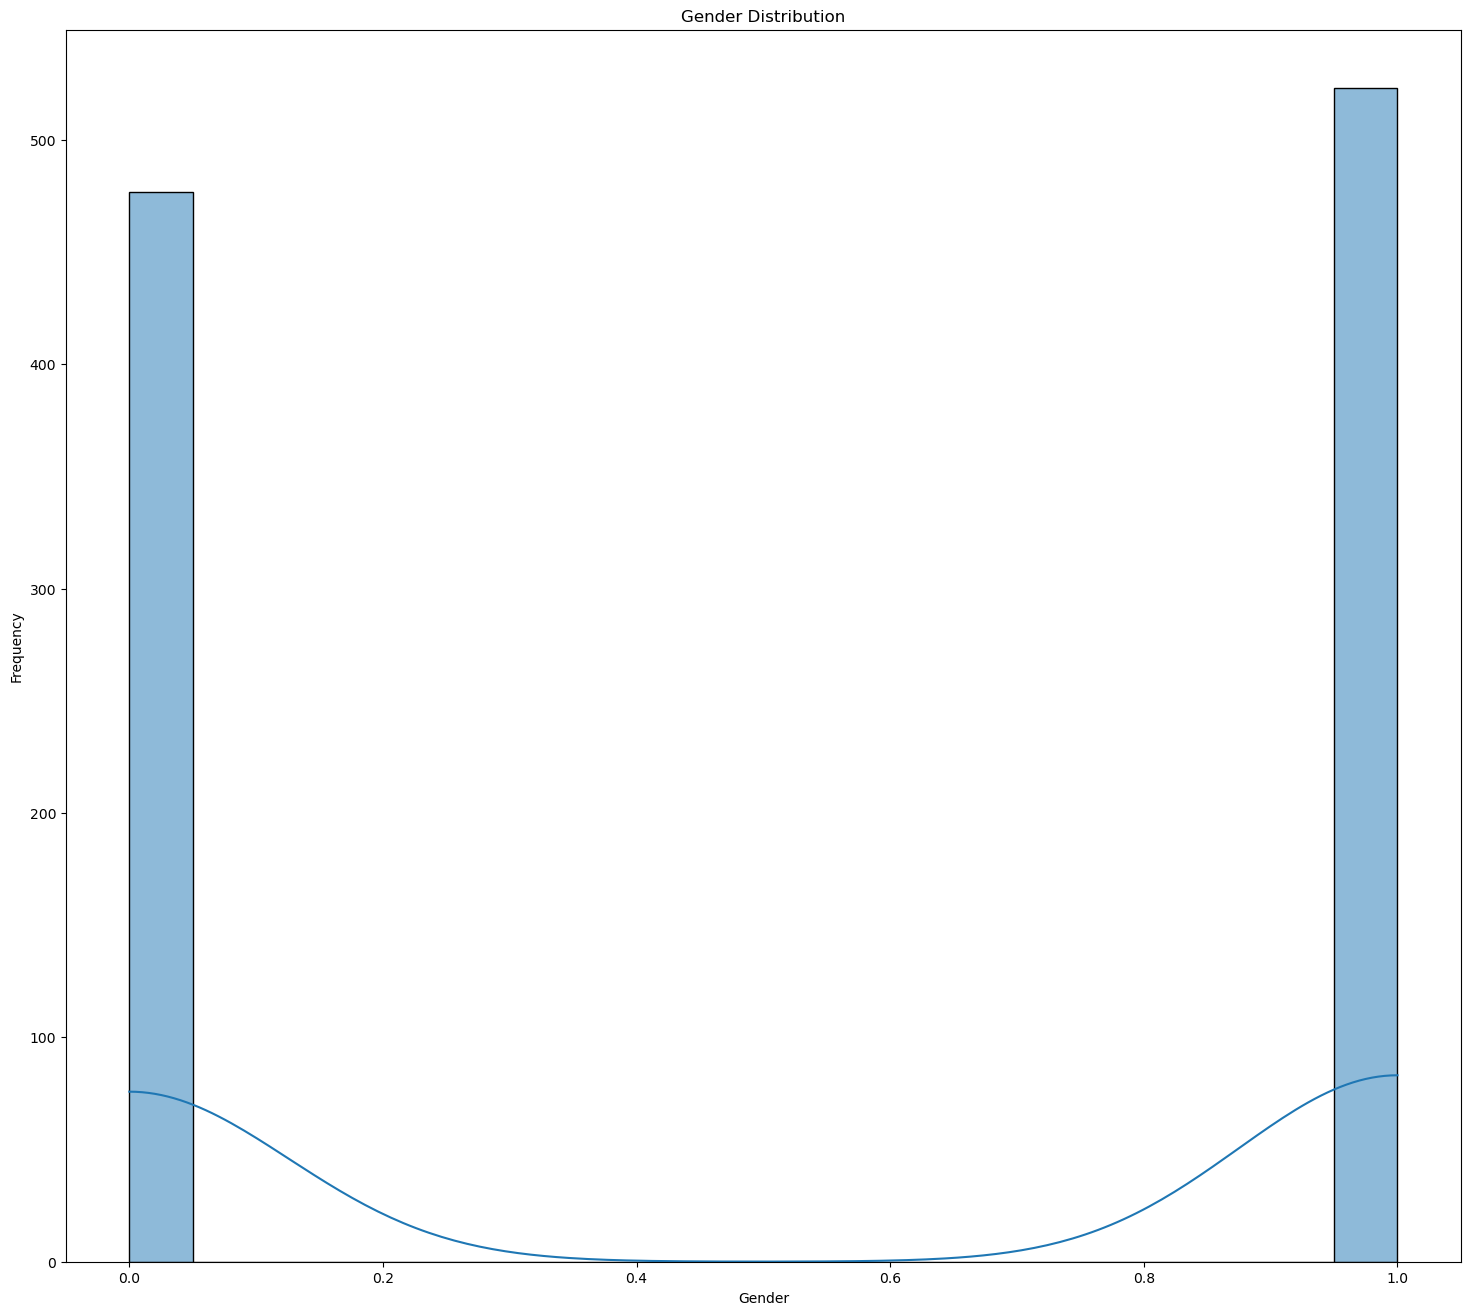

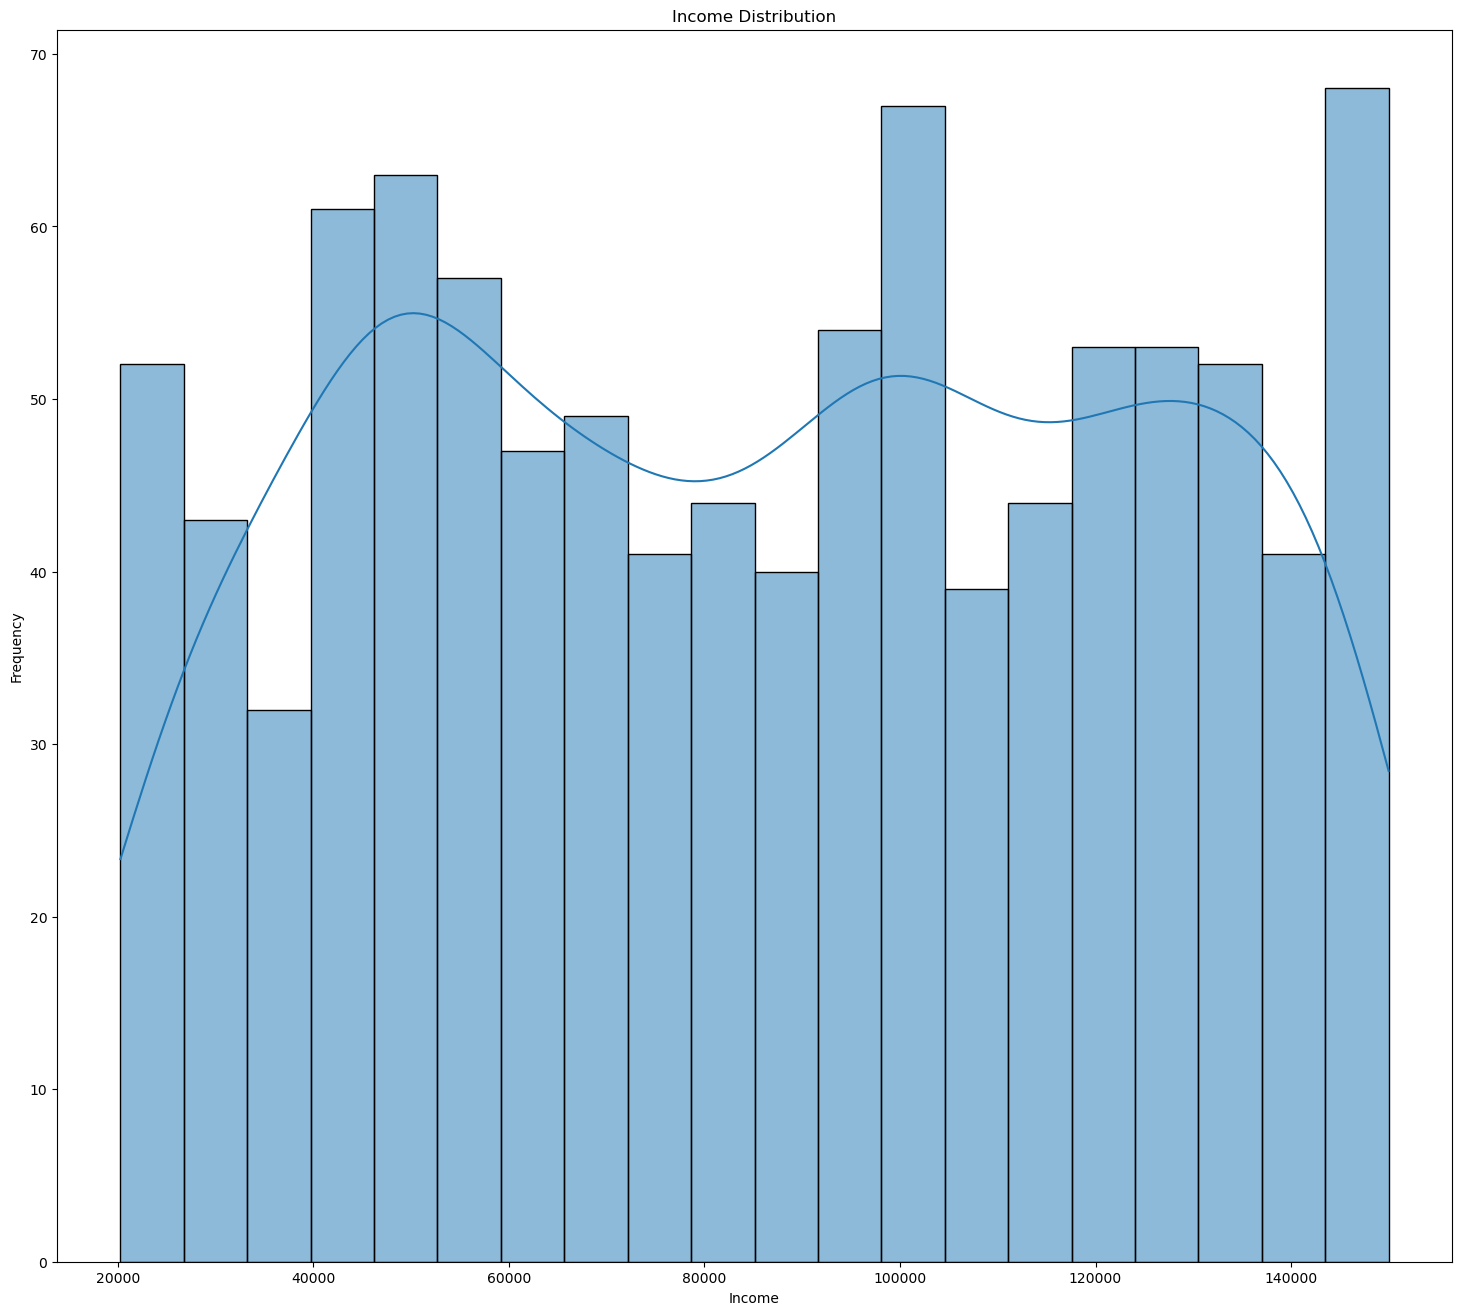

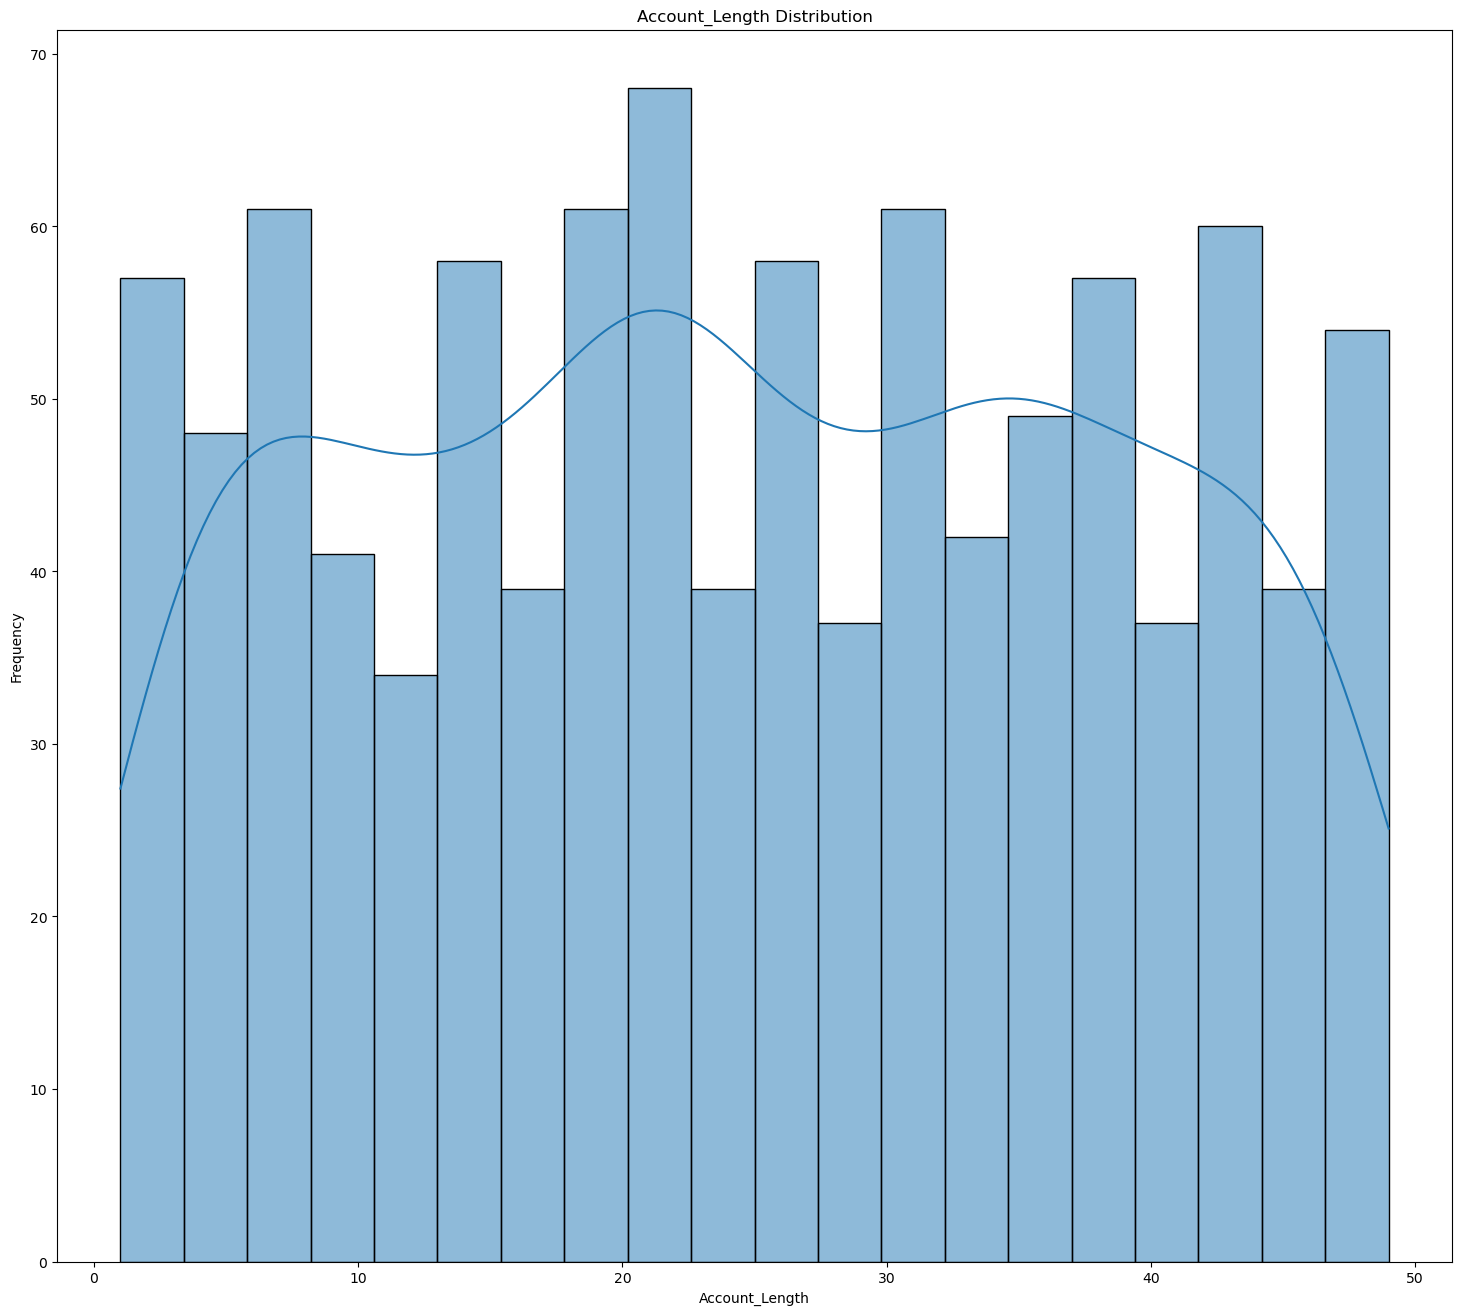

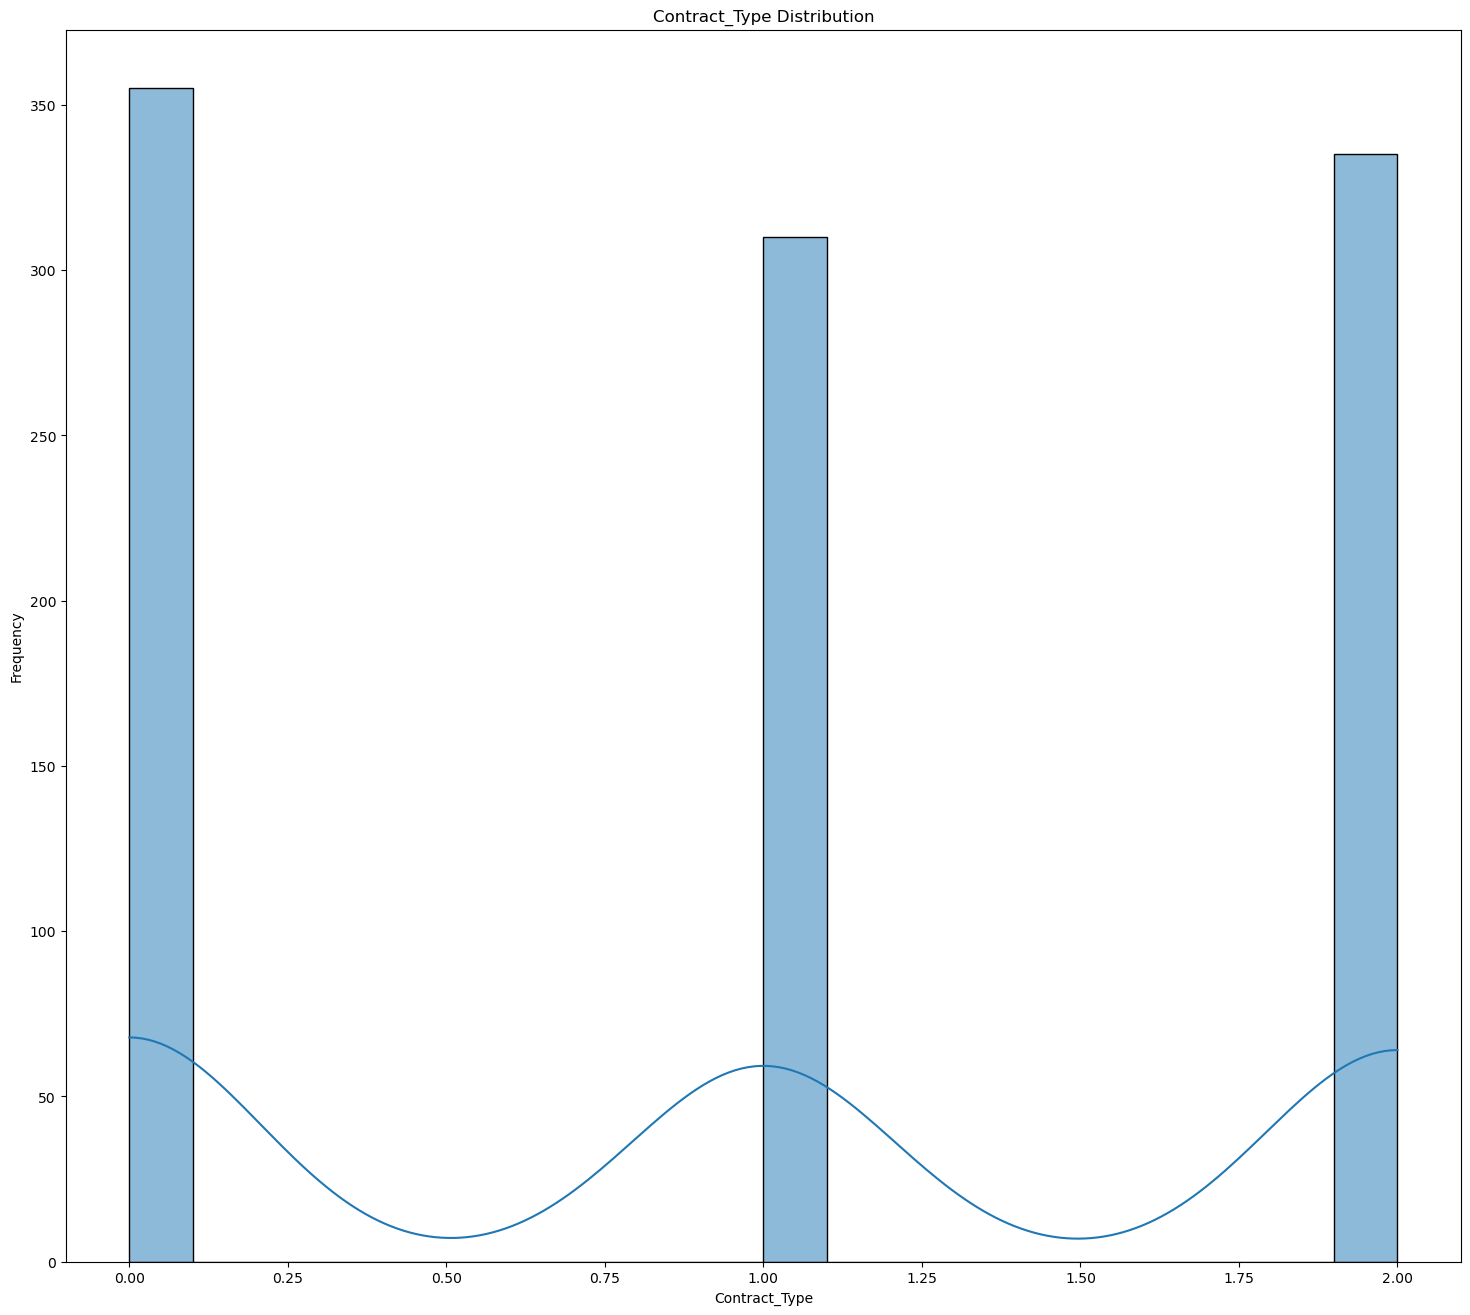

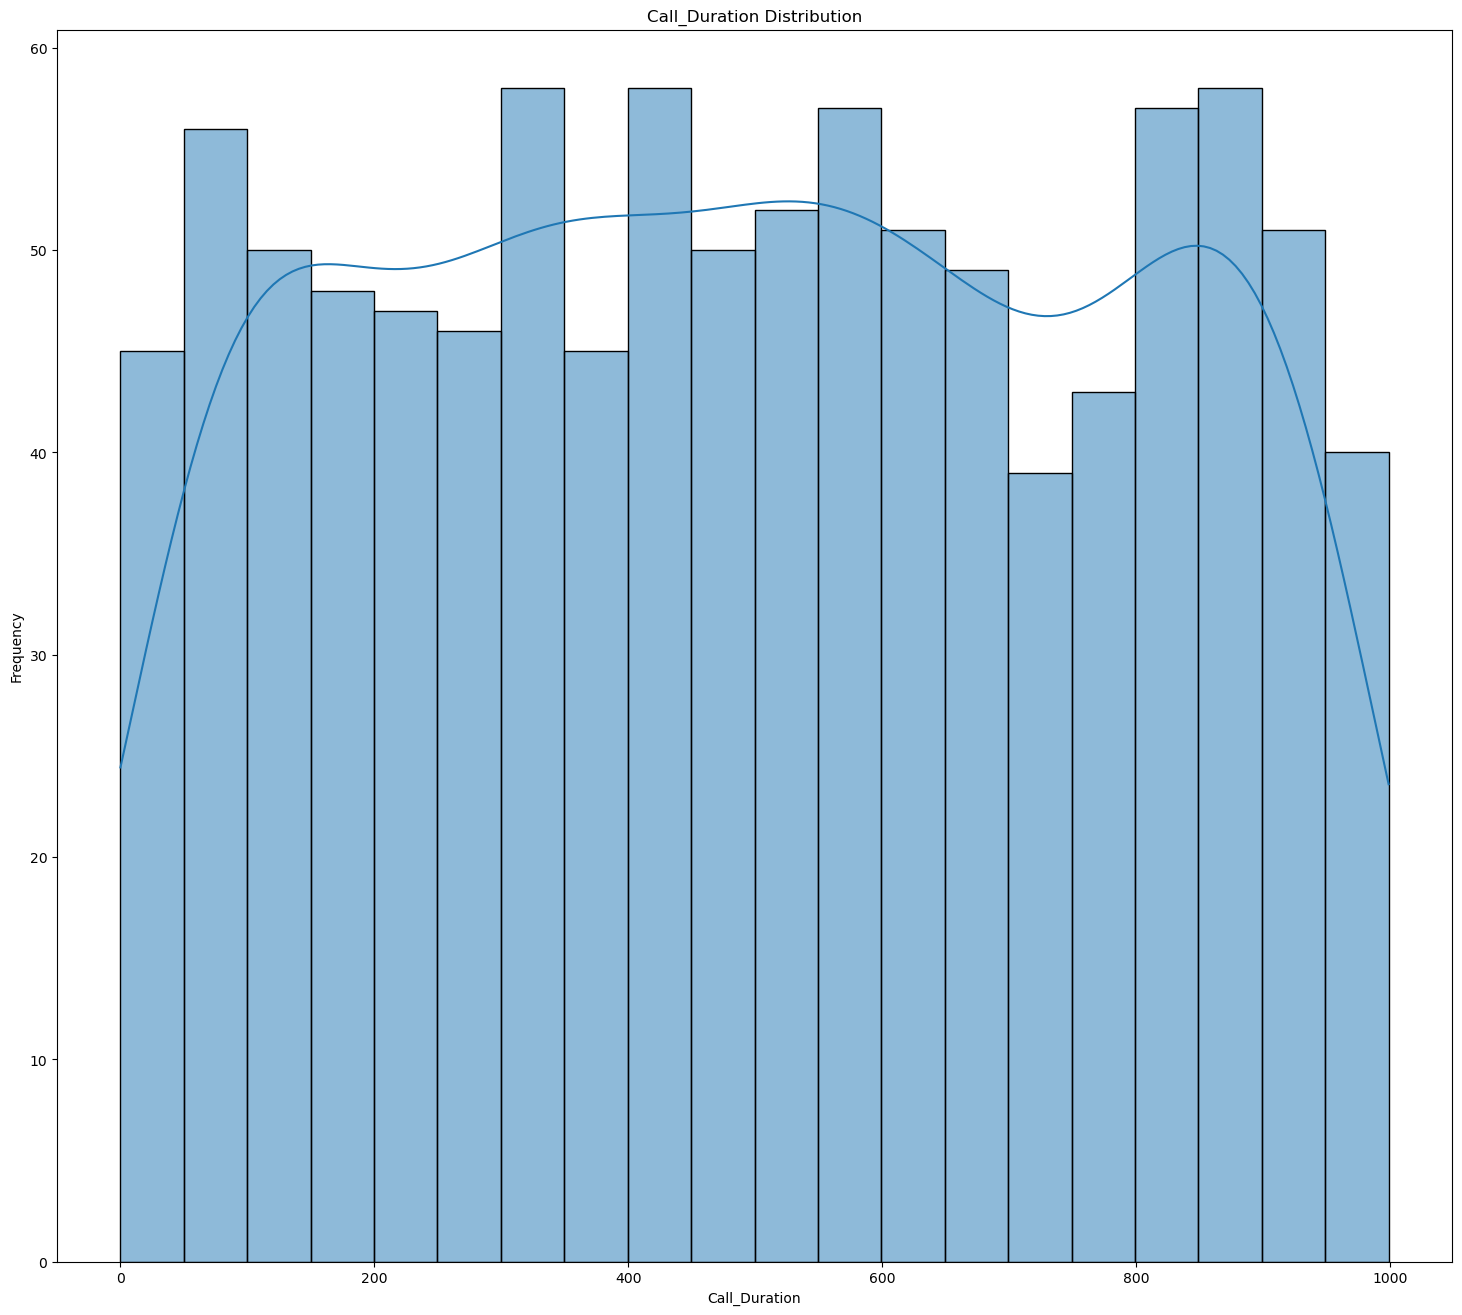

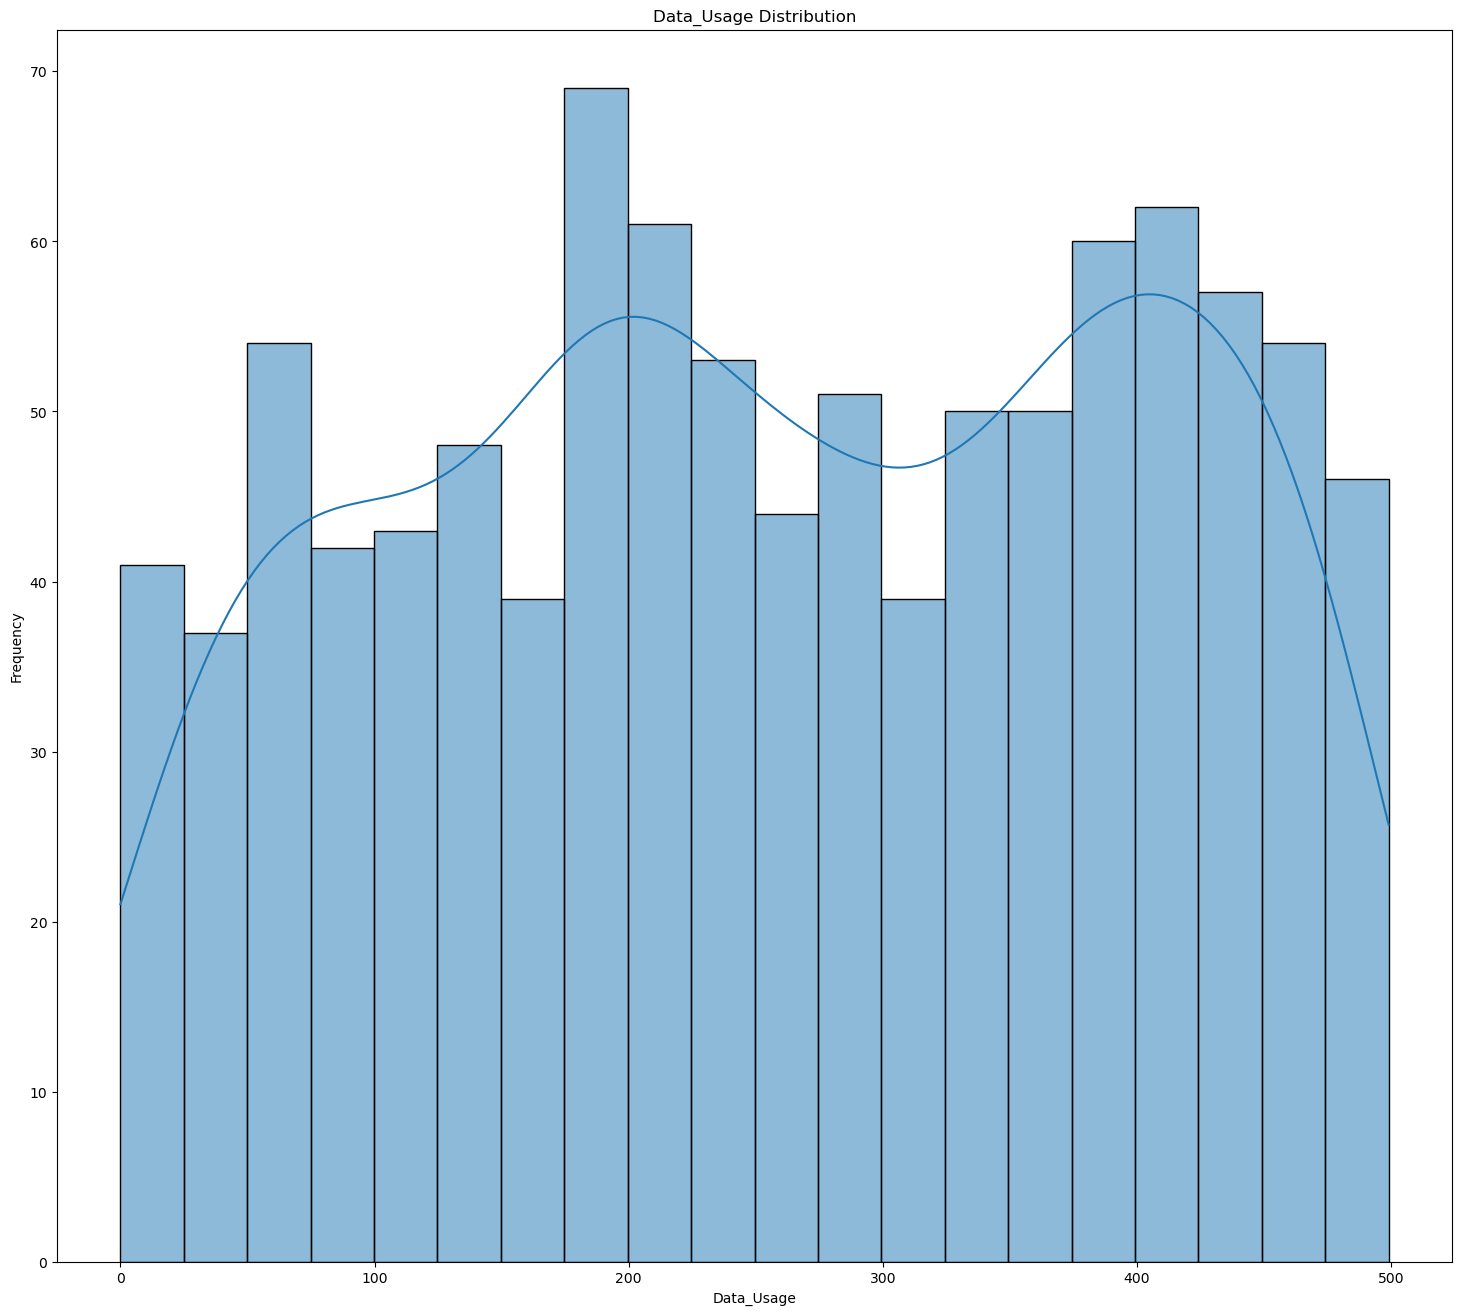

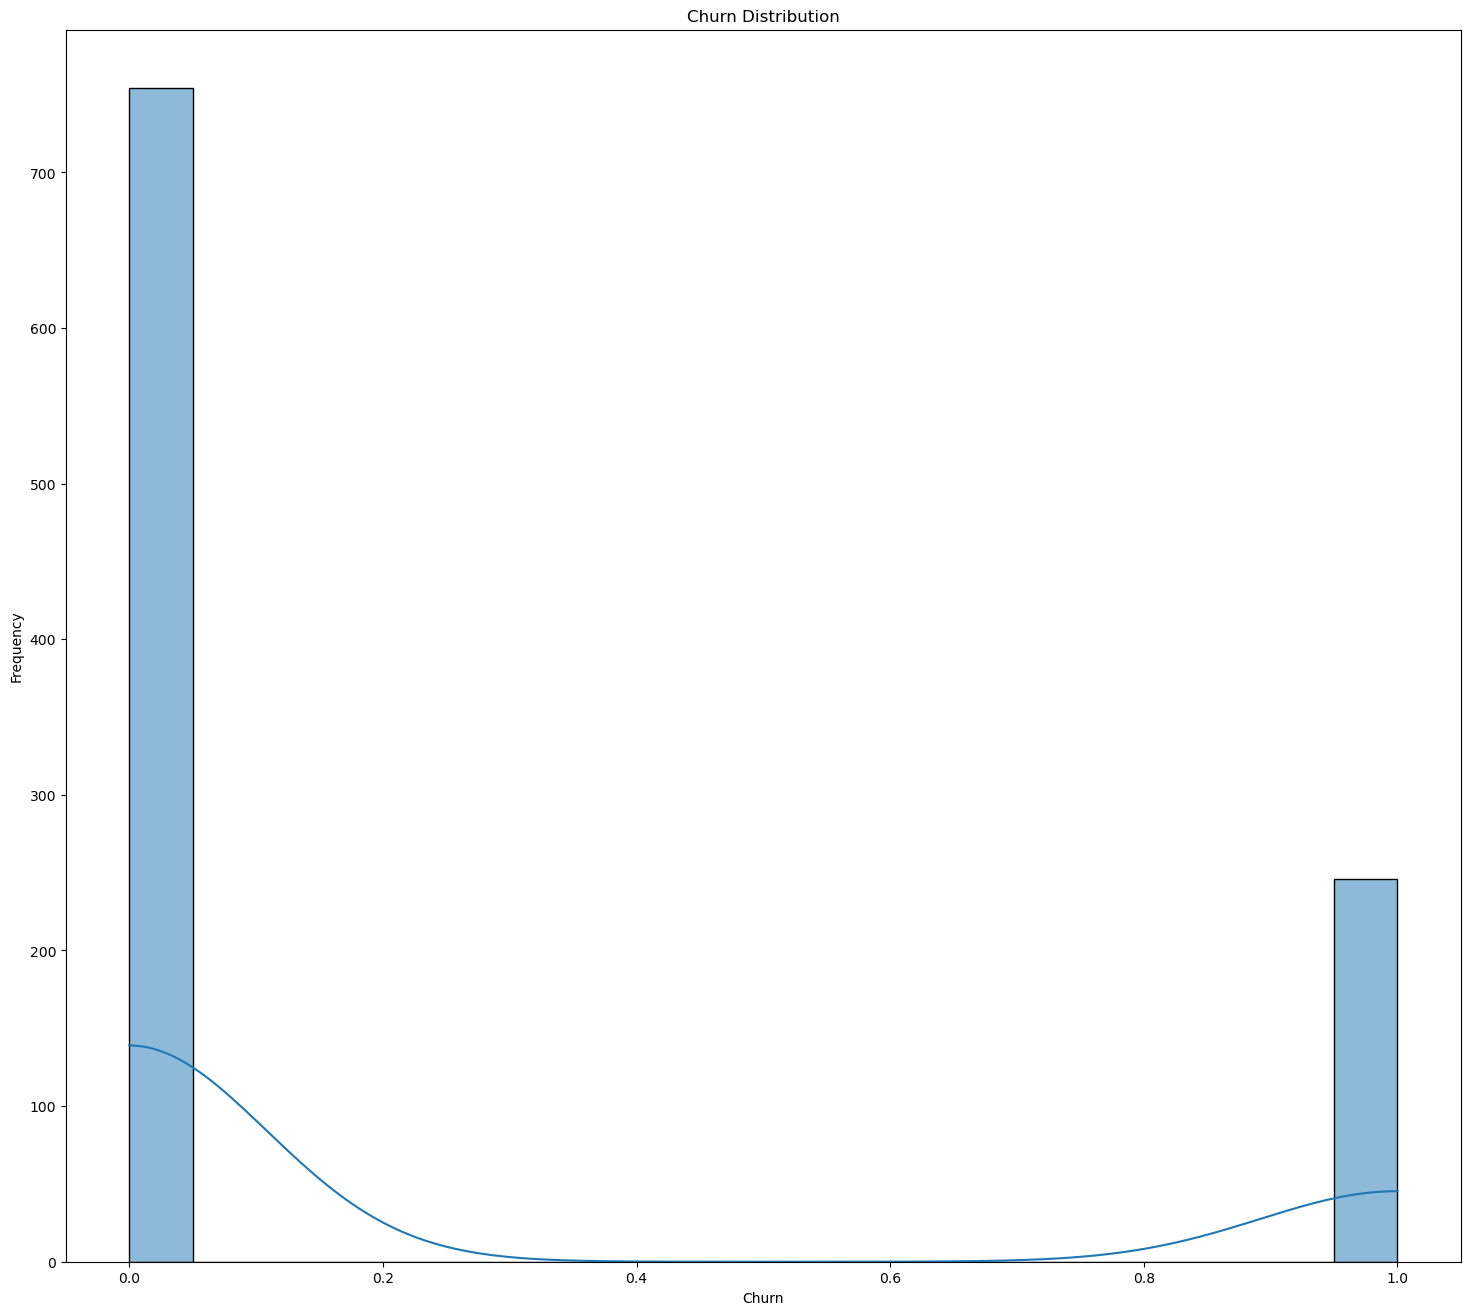

/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning:

The figure layout has changed to tight



<Figure size 1000x800 with 0 Axes>

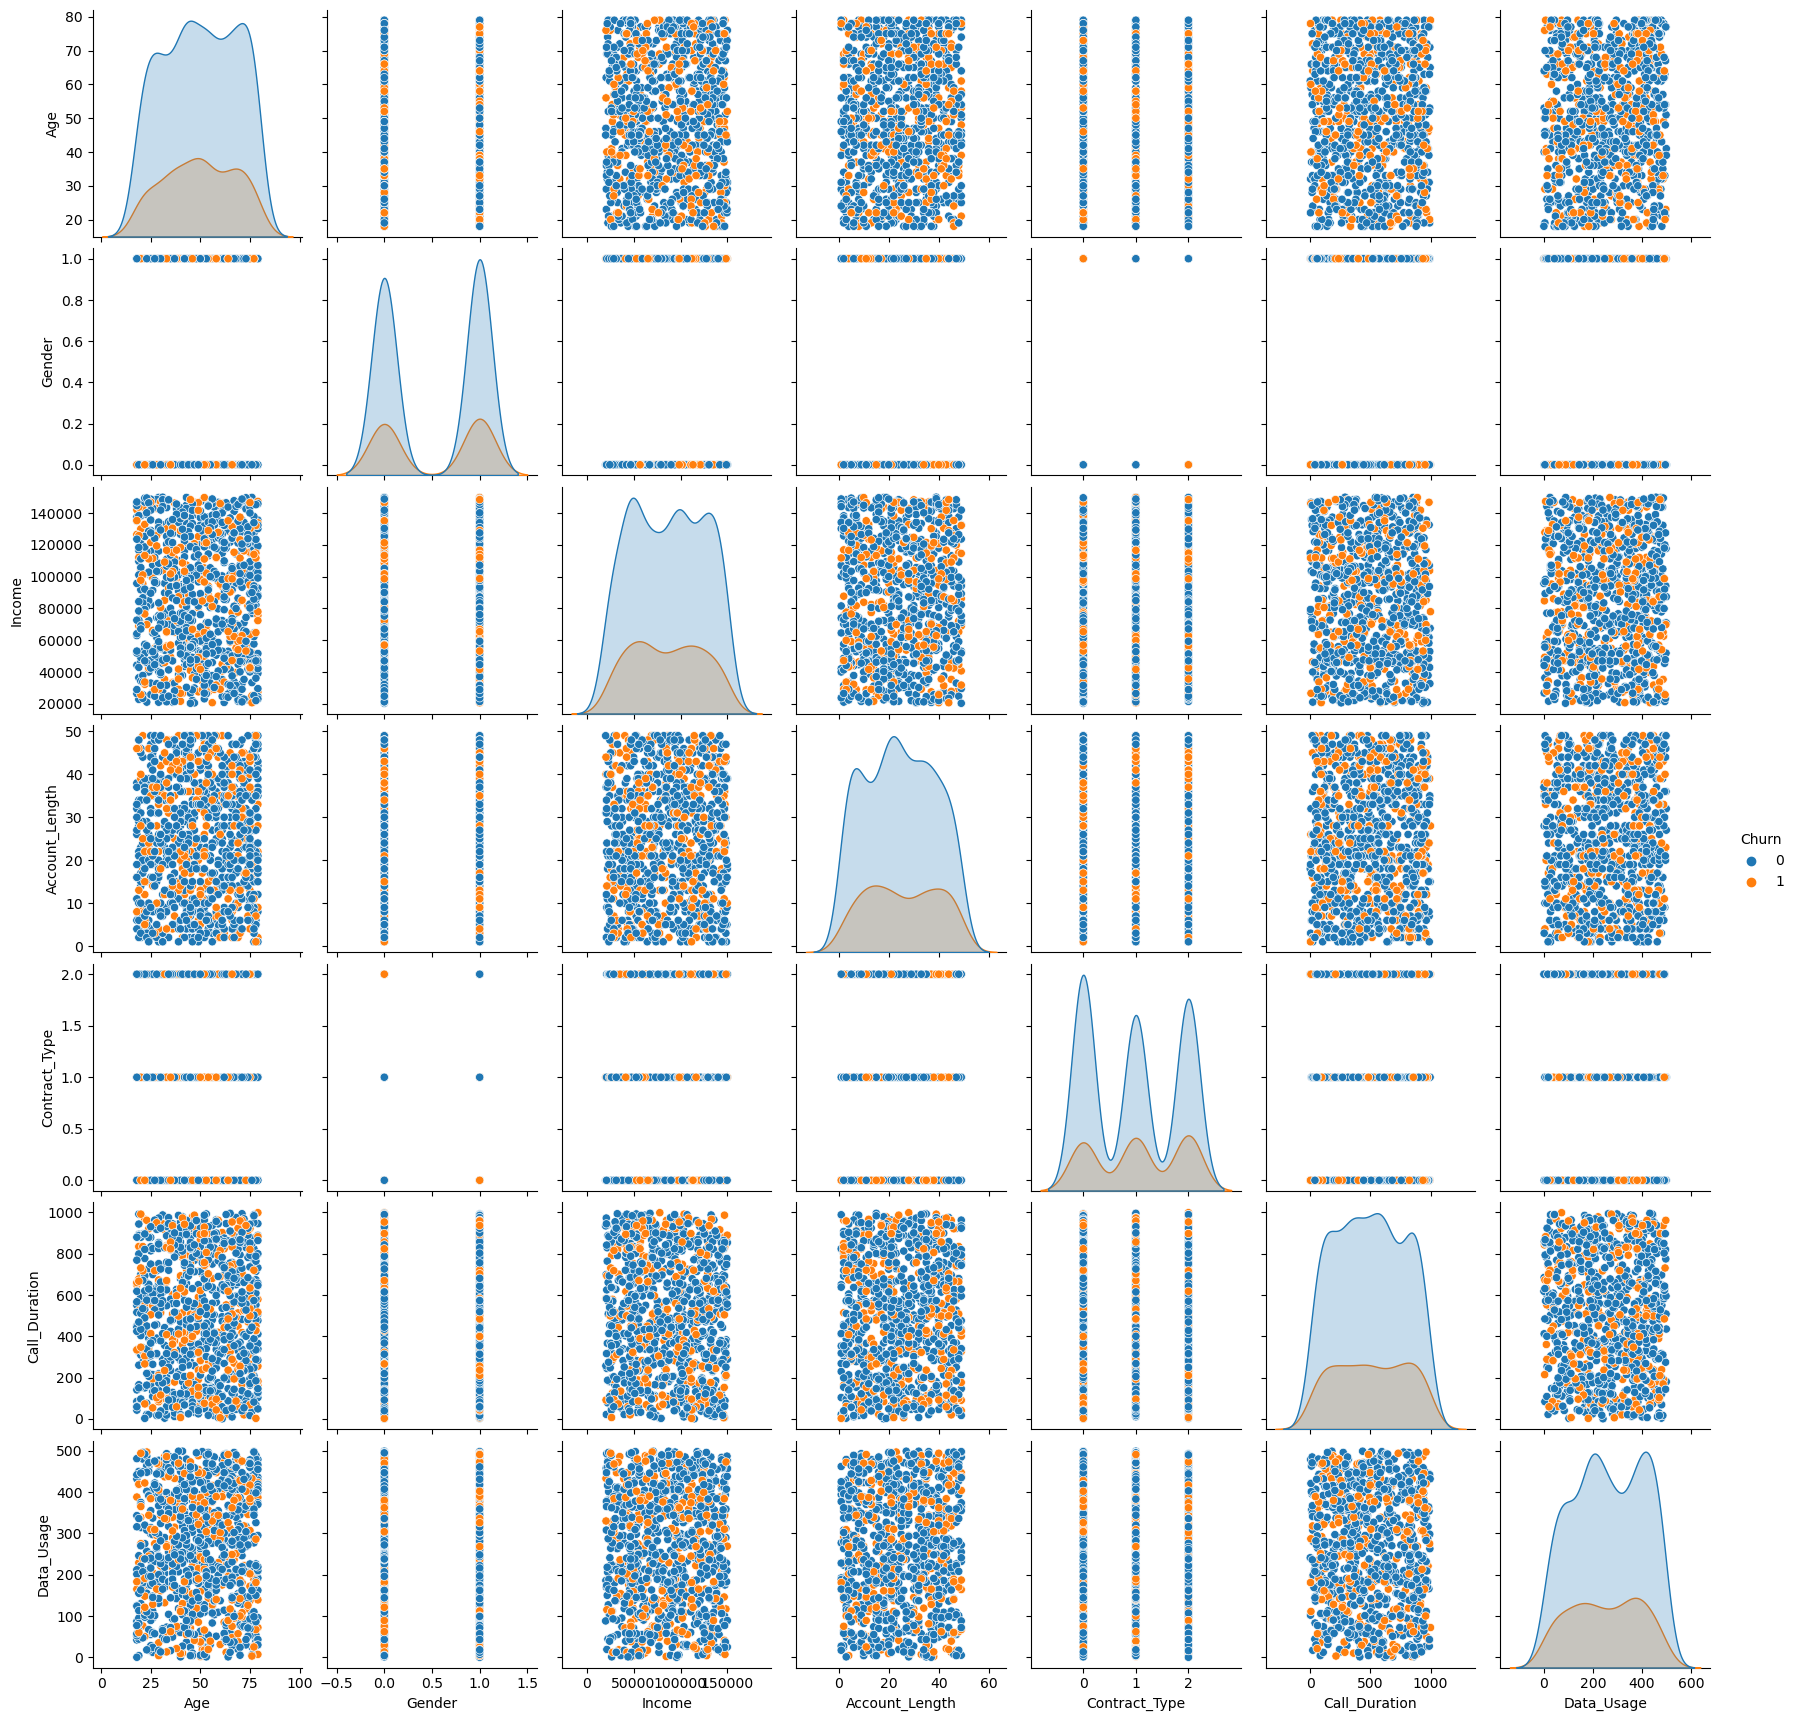

Data Shape: (1000, 8)
Columns: Index(['Age', 'Gender', 'Income', 'Account_Length', 'Contract_Type',
       'Call_Duration', 'Data_Usage', 'Churn'],
      dtype='object')
Data Types:
Age               int64
Gender            int64
Income            int64
Account_Length    int64
Contract_Type     int64
Call_Duration     int64
Data_Usage        int64
Churn             int64
dtype: object
Missing Values:
Age               0
Gender            0
Income            0
Account_Length    0
Contract_Type     0
Call_Duration     0
Data_Usage        0
Churn             0
dtype: int64
Summary Statistics:
               Age       Gender         Income  Account_Length  Contract_Type  \
count  1000.000000  1000.000000    1000.000000     1000.000000    1000.000000   
mean     49.857000     0.523000   86103.117000       24.731000       0.980000   
std      18.114267     0.499721   37880.237846       13.923451       0.830837   
min      18.000000     0.000000   20281.000000        1.000000       0.000000  

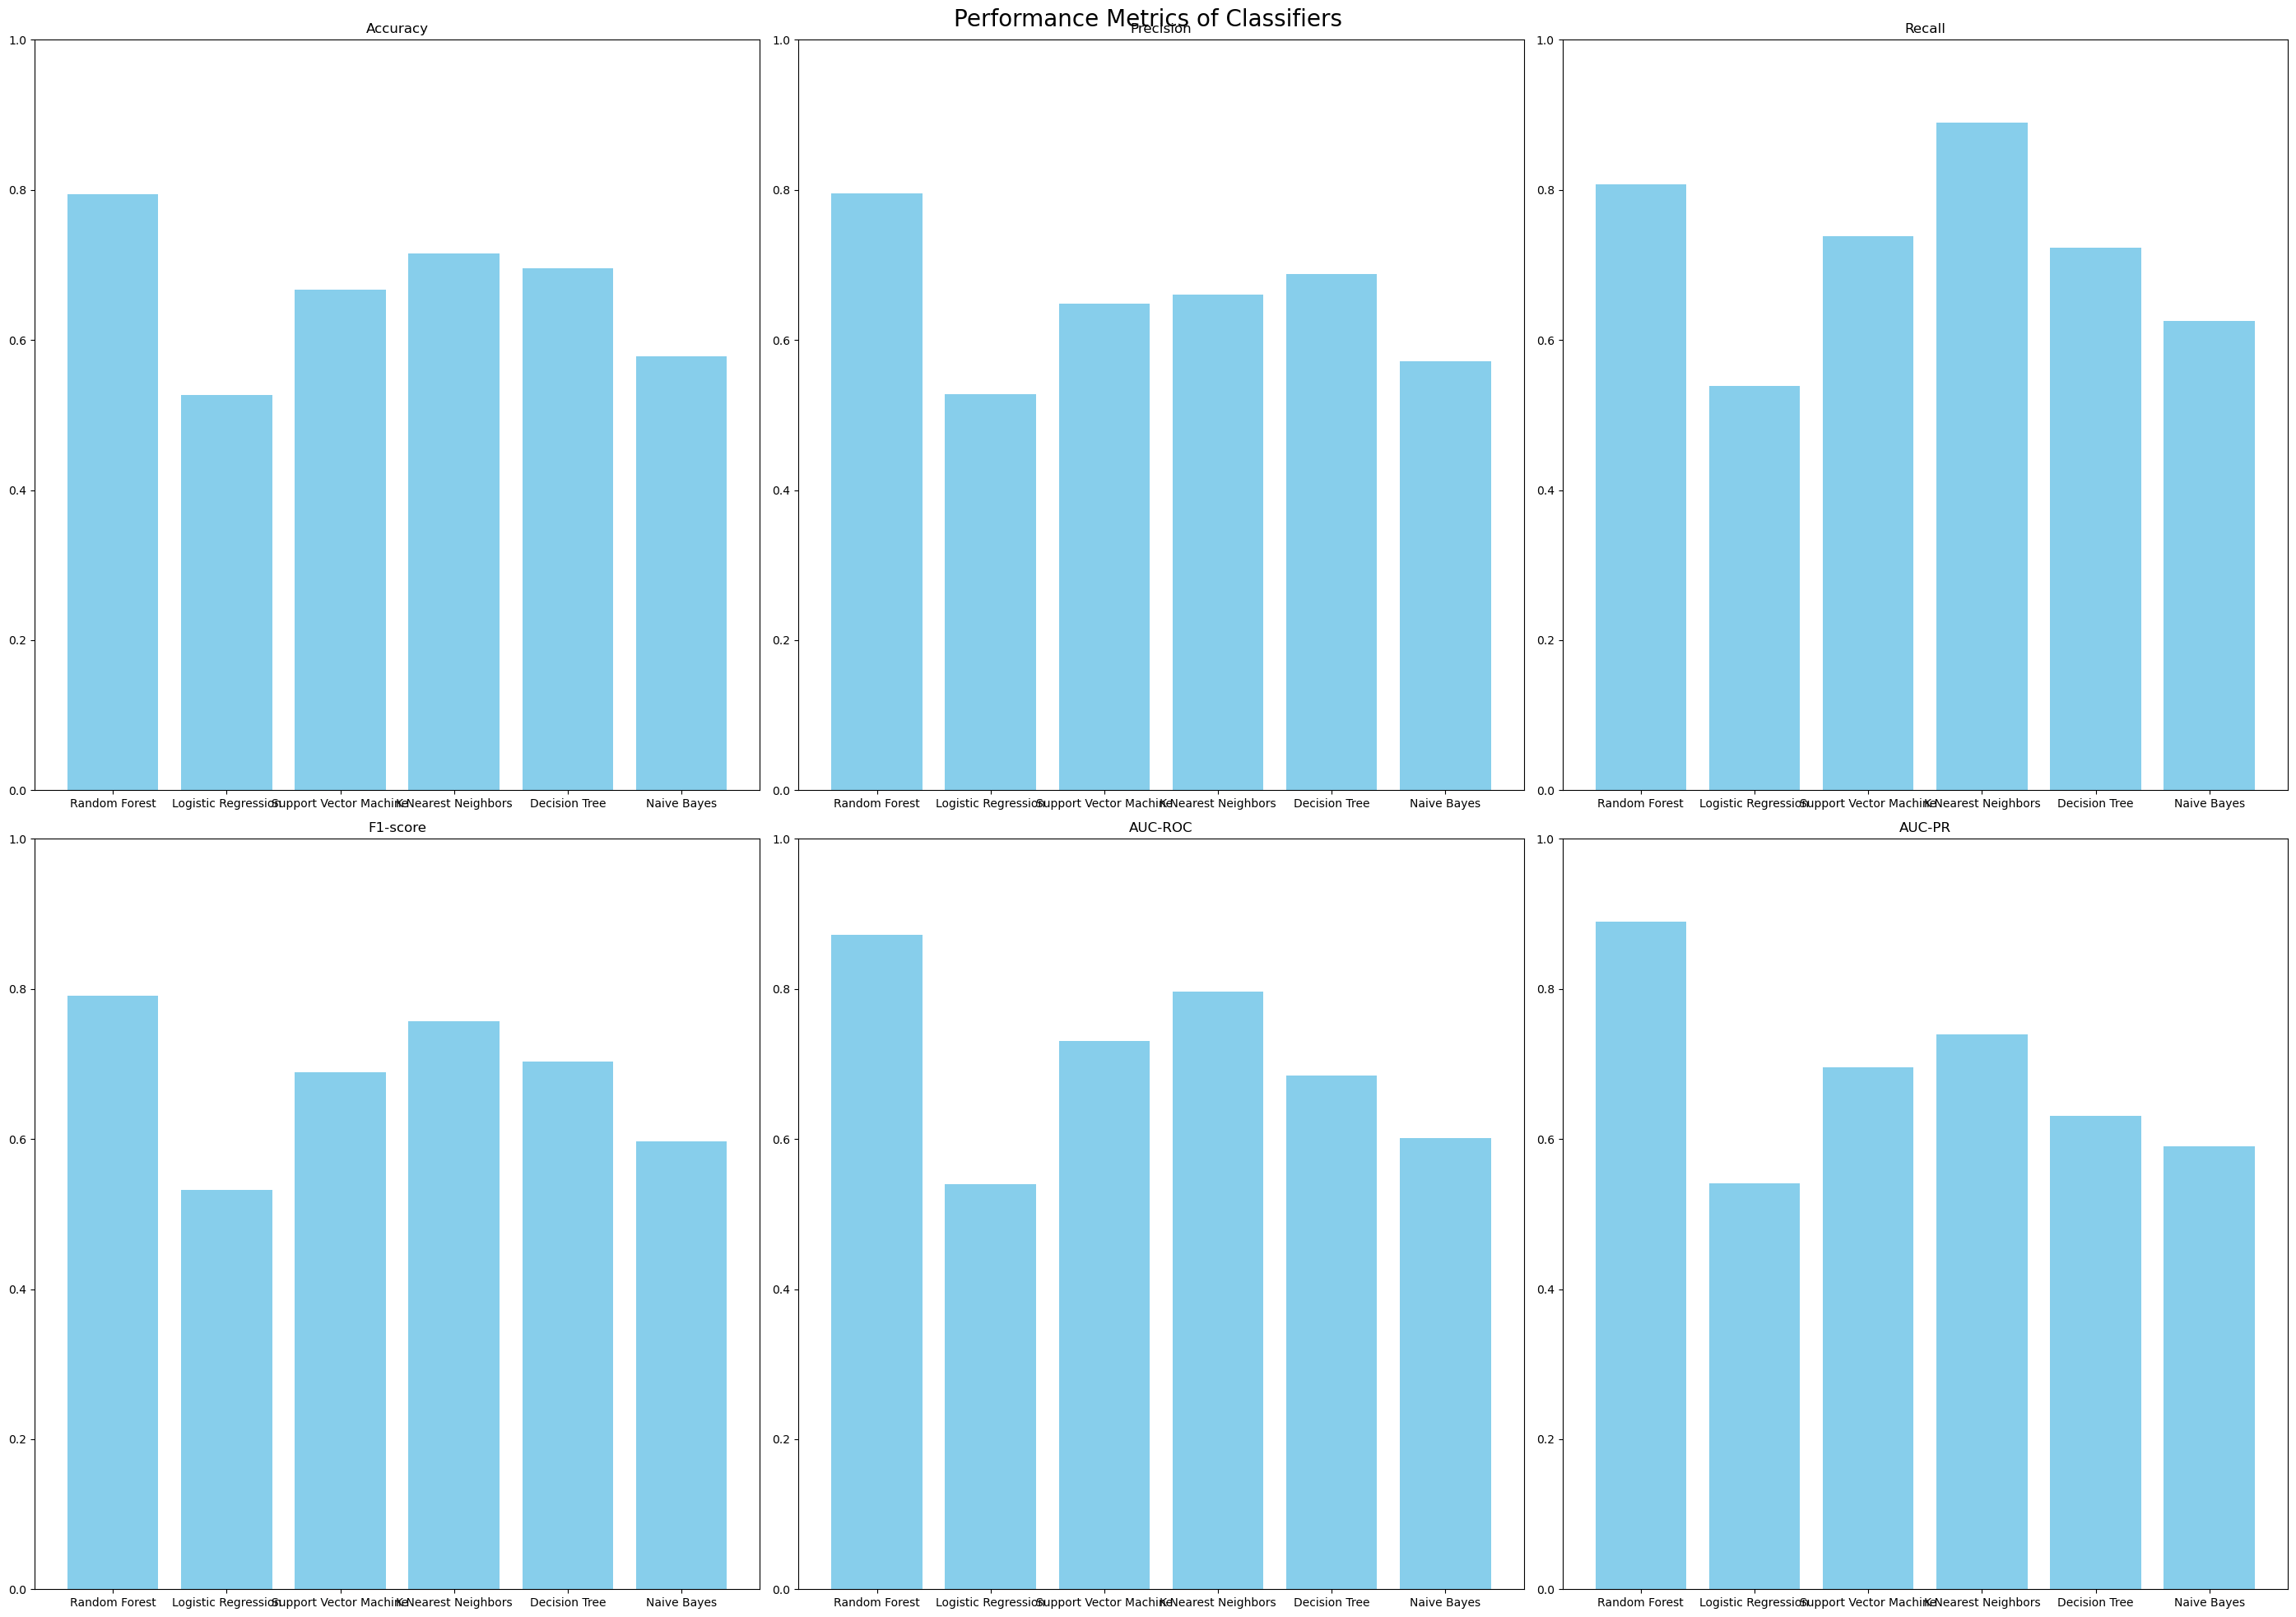

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=2, min_samples_split=2, 

/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


405 fits failed out of a total of 1215.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
207 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1467, in wrapper
    estimator._validate_params()
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_param

Best Parameters for Random Forest: {'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for Logistic Regression: {'C': 0.01, 'penalty': 'l2'}
Fitting 5 folds for each of 18 candidates, totalling 90 fits


/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:547: FitFailedWarning:


30 fits failed out of a total of 60.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
30 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/sklearn/base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/shivanigupta/anaconda3/lib/python3.11/site-packages/skl

Best Parameters for Support Vector Machine: {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best Parameters for K-Nearest Neighbors: {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Fitting 5 folds for each of 54 candidates, totalling 270 fits
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=200; total time=   0.0s
[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=10, n_estimators=100; total time=   0.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=10, n

,Accuracy,Precision,Recall,F1-score,AUC-ROC,AUC-PR
Random Forest,0.620,0.250000,0.133333,0.173913,0.453452,0.279207
Logistic Regression,0.450,0.239583,0.383333,0.294872,0.440595,0.277006
Support Vector Machine,0.555,0.269841,0.283333,0.276423,0.529048,0.319343
K-Nearest Neighbors,0.530,0.287500,0.383333,0.328571,0.472321,0.266293
Decision Tree,0.640,0.392857,0.366667,0.379310,0.561905,0.334048


In [38]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from imblearn.over_sampling import SMOTE
import seaborn as sns
import matplotlib.pyplot as plt

class ChurnPrediction:
    def __init__(self, data_path):
        self.data = pd.read_csv(data_path)
        self.X_train, self.X_test, self.y_train, self.y_test = None, None, None, None
        self.classifiers = {
            "Random Forest": RandomForestClassifier(class_weight='balanced'),
            "Logistic Regression": LogisticRegression(class_weight='balanced'),
            "Support Vector Machine": SVC(class_weight='balanced', probability=True),
            "K-Nearest Neighbors": KNeighborsClassifier(),
            "Decision Tree": DecisionTreeClassifier(class_weight='balanced'),
            "Naive Bayes": GaussianNB()
        }
    
    def preprocess_data(self):
        # Feature Engineering
        self.data['key'] = self.data['Age'].astype(str) + self.data['Gender'].astype(str) + \
                           self.data['Income'].astype(str) + self.data['Account_Length'].astype(str)

        # Separate features and target variable
        self.X = self.data.drop(columns=['Churn'])
        self.y = self.data['Churn']

        # Train-test split
        self.X_train, self.X_test, self.y_train, self.y_test = train_test_split(self.X, self.y, test_size=0.2, random_state=42)

        # Feature scaling
        scaler = StandardScaler()
        self.X_train = scaler.fit_transform(self.X_train)
        self.X_test = scaler.transform(self.X_test)

    def resample_data(self):
        # Resample the training data using SMOTE
        smote = SMOTE(random_state=42)
        self.X_train, self.y_train = smote.fit_resample(self.X_train, self.y_train)
    
    def evaluate_classifiers(self):
        metric_names = ["Accuracy", "Precision", "Recall", "F1-score", "AUC-ROC", "AUC-PR"]
        classifier_names = list(self.classifiers.keys())
        scores_dict = {metric: {clf_name: [] for clf_name in classifier_names} for metric in metric_names}

        for clf_name, clf in self.classifiers.items():
            skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
            for metric_name in metric_names:
                scores = []

                for train_index, test_index in skf.split(self.X_train, self.y_train):
                    X_train_fold, X_val_fold = self.X_train[train_index], self.X_train[test_index]
                    y_train_fold, y_val_fold = self.y_train.iloc[train_index], self.y_train.iloc[test_index]

                    clf.fit(X_train_fold, y_train_fold)
                    y_pred = clf.predict(X_val_fold)
                    y_proba = clf.predict_proba(X_val_fold)[:, 1]

                    if metric_name == "Accuracy":
                        scores.append(accuracy_score(y_val_fold, y_pred))
                    elif metric_name == "Precision":
                        scores.append(precision_score(y_val_fold, y_pred))
                    elif metric_name == "Recall":
                        scores.append(recall_score(y_val_fold, y_pred))
                    elif metric_name == "F1-score":
                        scores.append(f1_score(y_val_fold, y_pred))
                    elif metric_name == "AUC-ROC":
                        scores.append(roc_auc_score(y_val_fold, y_proba))
                    elif metric_name == "AUC-PR":
                        scores.append(average_precision_score(y_val_fold, y_proba))

                scores_dict[metric_name][clf_name] = np.mean(scores)

        # Tabulating scores
        scores_df = pd.DataFrame(scores_dict)
        print("Performance Metrics of Classifiers:")
        print(scores_df)

        # Plotting
        fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(28, 20))
        fig.suptitle('Performance Metrics of Classifiers', fontsize=20)

        for i, ax in enumerate(axes.flat):
            metric_name = metric_names[i]
            scores = [scores_dict[metric_name][clf_name] for clf_name in classifier_names]
            ax.bar(classifier_names, scores, color='skyblue')
            ax.set_title(metric_name)
            ax.set_ylim([0, 1])

        plt.tight_layout()
        plt.show()

        return scores_df

    def visualize_data(self):
        # Univariate Analysis
        for column in self.data.columns:
            if self.data[column].dtype == 'int64' or self.data[column].dtype == 'float64':
                plt.figure(figsize=(18, 16))
                sns.histplot(self.data[column], bins=20, kde=True)
                plt.title(f'{column} Distribution')
                plt.xlabel(column)
                plt.ylabel('Frequency')
                plt.show()

        # Bivariate Analysis
        plt.figure(figsize=(10, 8))
        sns.pairplot(self.data, hue='Churn', diag_kind='kde')
        plt.show()

        # EDA (Exploratory Data Analysis)
        print("Data Shape:", self.data.shape)
        print("Columns:", self.data.columns)
        print("Data Types:")
        print(self.data.dtypes)
        print("Missing Values:")
        print(self.data.isnull().sum())
        print("Summary Statistics:")
        print(self.data.describe())
        print("Churn Distribution:")
        print(self.data['Churn'].value_counts())

    def hyperparameter_tuning(self):
        best_estimators = {}

        # Random Forest
        param_grid_rf = {
            'n_estimators': [50, 100, 200],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4],
            'max_features': ['auto', 'sqrt', 'log2']
        }
        grid_search_rf = GridSearchCV(RandomForestClassifier(class_weight='balanced'), param_grid=param_grid_rf, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        grid_search_rf.fit(self.X_train, self.y_train)
        best_estimators["Random Forest"] = grid_search_rf.best_estimator_
        print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

        # Logistic Regression
        param_grid_lr = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],
            'penalty': ['l1', 'l2']
        }
        grid_search_lr = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid=param_grid_lr, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        grid_search_lr.fit(self.X_train, self.y_train)
        best_estimators["Logistic Regression"] = grid_search_lr.best_estimator_
        print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

        # Support Vector Machine
        param_grid_svm = {
            'C': [0.1, 1, 10],
            'kernel': ['linear', 'rbf', 'poly'],
            'gamma': ['scale', 'auto']
        }
        grid_search_svm = GridSearchCV(SVC(class_weight='balanced', probability=True), param_grid=param_grid_svm, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        grid_search_svm.fit(self.X_train, self.y_train)
        best_estimators["Support Vector Machine"] = grid_search_svm.best_estimator_
        print("Best Parameters for Support Vector Machine:", grid_search_svm.best_params_)

        # K-Nearest Neighbors
        param_grid_knn = {
            'n_neighbors': [3, 5, 7],
            'weights': ['uniform', 'distance'],
            'p': [1, 2]
        }
        grid_search_knn = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid_knn, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        grid_search_knn.fit(self.X_train, self.y_train)
        best_estimators["K-Nearest Neighbors"] = grid_search_knn.best_estimator_
        print("Best Parameters for K-Nearest Neighbors:", grid_search_knn.best_params_)

        # Decision Tree
        param_grid_dt = {
            'criterion': ['gini', 'entropy'],
            'max_depth': [None, 10, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
        }
        grid_search_dt = GridSearchCV(DecisionTreeClassifier(class_weight='balanced'), param_grid=param_grid_dt, cv=5, scoring='accuracy', verbose=2, n_jobs=-1)
        grid_search_dt.fit(self.X_train, self.y_train)
        best_estimators["Decision Tree"] = grid_search_dt.best_estimator_
        print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

        # Naive Bayes (No hyperparameters to tune)

        return best_estimators

    def evaluate_test_performance(self, best_classifiers):
        test_scores = {}
        for clf_name, clf in best_classifiers.items():
            y_pred_test = clf.predict(self.X_test)
            y_proba_test = clf.predict_proba(self.X_test)[:, 1]

            test_scores[clf_name] = {
                "Accuracy": accuracy_score(self.y_test, y_pred_test),
                "Precision": precision_score(self.y_test, y_pred_test),
                "Recall": recall_score(self.y_test, y_pred_test),
                "F1-score": f1_score(self.y_test, y_pred_test),
                "AUC-ROC": roc_auc_score(self.y_test, y_proba_test),
                "AUC-PR": average_precision_score(self.y_test, y_proba_test)
            }

        # Tabulating scores
        test_scores_df = pd.DataFrame(test_scores).T
        print("Test Set Performance:")
        print(test_scores_df)

        return test_scores_df

# Instantiate and run the churn prediction class
churn_predictor = ChurnPrediction("/Users/shivanigupta/Downloads/Customer_Churn_Dataset.csv")
churn_predictor.visualize_data()
churn_predictor.preprocess_data()
churn_predictor.resample_data()
churn_predictor.evaluate_classifiers()
best_classifiers = churn_predictor.hyperparameter_tuning()
churn_predictor.evaluate_test_performance(best_classifiers)


In [ ]:
#Random Forest has best results